In [83]:
#import the pandas library as pd

import pandas as pd

In [84]:
#import our data with the read_csv function and rename it 'data' 

data = pd.read_csv('/Users/kirstenbjornson/Desktop/Data Science documents/Demographic_Data.csv')

In [85]:
#view a quick sample of the dataframe

data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [86]:
#use the describe() function to help us understand some basic info about the data

data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [87]:
#use the info() function to check the data types of each variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [88]:
#drop duplicate rows

data = data.drop_duplicates()

In [89]:
#check the data for missing values -- there are none in this dataset

print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [90]:
#see the number of times each region occurs in the data (number of total purchases per region)
#region 1 = north
#region 2 = south
#region 3 = east
#region 4 = west

data['region'].value_counts()

4    25988
2    19994
3    18000
1    15997
Name: region, dtype: int64

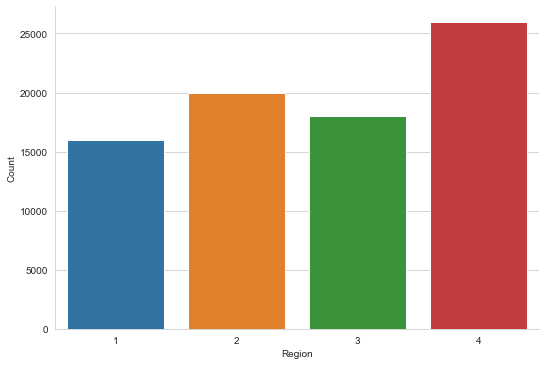

In [91]:
#plot the above numbers on a bar chart using seaborn
#the most purchases were made by region 4, followed by 2, 3, and 1

import seaborn as sn

reg = sn.catplot(x = 'region', data = data, kind = 'count', aspect = 1.5)
reg.set_xlabels('Region')
reg.set_ylabels('Count')

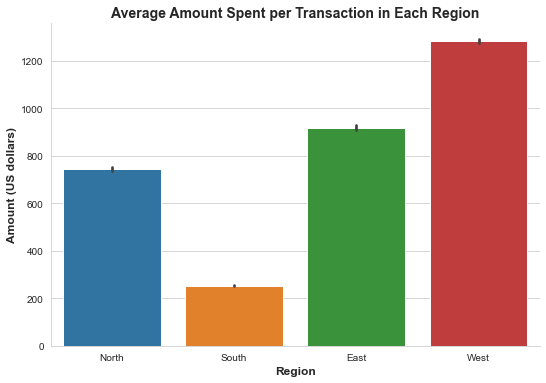

In [142]:
#create a bar graph comparing average amount spent in each region
#region 4 spent the most on average, followed by 3, 1, and 2

sn.set_style('whitegrid') #set graph style -- it sets this for ALL of the graphs in the notebook
avg = sn.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', aspect = 1.5)
plt.title('Average Amount Spent per Transaction in Each Region', weight = 'bold', fontsize = 14)
avg.set_xlabels('Region', weight = 'bold', fontsize = 12)
avg.set_ylabels('Amount (US dollars)', weight = 'bold', fontsize = 12) #
avg.set(xticklabels = ['North', 'South', 'East', 'West']) #change label names for x axis
sn.despine() #get rid of tick marks along axes
for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha = "center", fontsize = 12)
#plt.savefig('avgamount.png')

In [93]:
# find the average amount spent in each region and compare to previous graph

reg1 = data.loc[data['region'] == 1, :]
reg2 = data.loc[data['region'] == 2, :]
reg3 = data.loc[data['region'] == 3, :]
reg4 = data.loc[data['region'] == 4, :]

A = reg1['amount'].mean()
B = reg2['amount'].mean()
C = reg3['amount'].mean()
D = reg4['amount'].mean()

print(A)
print(B)
print(C)
print(D)

744.9909391135837
252.09774149744922
917.9696374444444
1283.9383569339695


In [140]:
#average age per region

age1 = reg1['age'].mean()
age2 = reg2['age'].mean()
age3 = reg3['age'].mean()
age4 = reg4['age'].mean()

print(age1)
print(age2)
print(age3)
print(age4)

43.70413202475464
56.60908272481745
45.64694444444444
38.752424195782666


In [94]:
#total amounts spent per region

total1 = reg1['amount'].sum()
total2 = reg2['amount'].sum()
total3 = reg3['amount'].sum()
total4 = reg4['amount'].sum()

print(total1)
print(total2)
print(total3)
print(total4)

11917620.053
5040442.2435
16523453.474
33366990.02


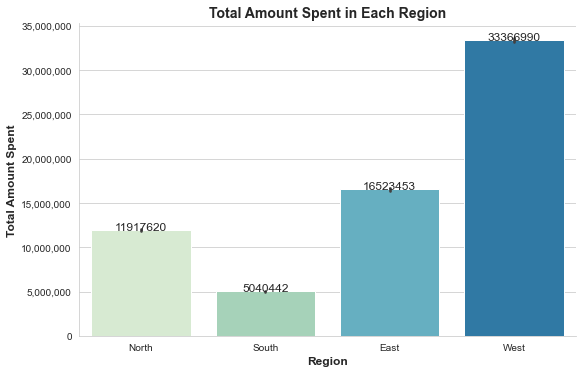

In [138]:
#graph of total amount spent per region
#to change format of axes notation, import matplotlib.ticker

import matplotlib.ticker as tkr #used to change scientific notation on graph

fig = sn.catplot(x = 'region', y = 'amount', data = data, kind = 'bar', estimator = sum, aspect = 1.5, palette = 'GnBu')
fig.set_xlabels('Region', weight = 'bold', fontsize = 12)
fig.set_ylabels('Total Amount Spent', weight = 'bold', fontsize = 12)
plt.title('Total Amount Spent in Each Region', weight = 'bold', fontsize = 14)
fig.set(xticklabels = ['North', 'South', 'East', 'West'])
for ax in fig.axes.flat: #this loop changes the notation on the graphs y axis
    ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
for p in ax.patches: #used this to get numbers on top of bar graph
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha = "center", fontsize = 12)
#plt.savefig('totalamt.png')

In [96]:
#see the number of total purchases made online vs in-store
#in-store = 1
#online = 0

data['in-store'].value_counts()

1    39990
0    39989
Name: in-store, dtype: int64

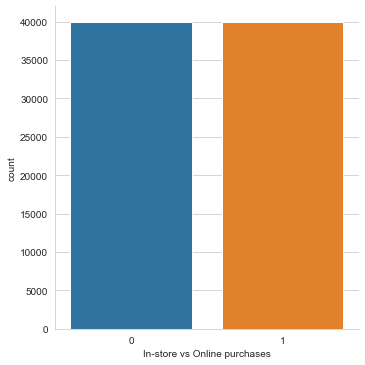

In [97]:
#create a bar graph reflecting the above info

ins = sn.catplot(x = 'in-store', data = data, kind = 'count', aspect = 1)
ins.set_xlabels('In-store vs Online purchases')

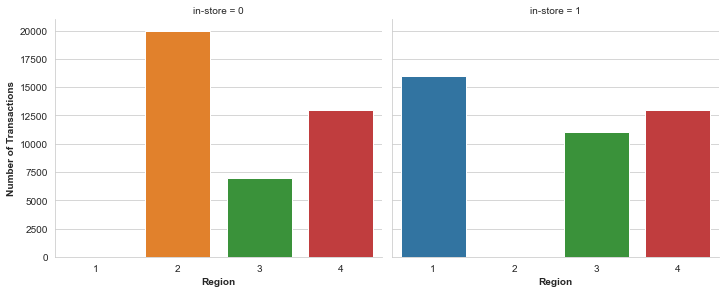

In [137]:
#create bar chart using seaborn comparing number of purchases in each region made onine vs in-store
#it looks like everyone is region 2 is buying online, and everyone in region 1 is buying in-store

fig = sn.catplot(x ='region', data = data, kind = 'count', col = 'in-store', aspect = 1.25, height = 4)
fig.set_xlabels('Region', weight = 'bold')
fig.set_ylabels('Number of Transactions', weight = 'bold')

In [99]:
#by using the groupby function we can see the number of people within each region that purchased online vs in-store

data.groupby(['in-store', 'region'])['in-store'].count()

in-store  region
0         2         19994
          3          7001
          4         12994
1         1         15997
          3         10999
          4         12994
Name: in-store, dtype: int64

In [100]:
import matplotlib.pyplot as plt

In [101]:
#shows us the column names in the dataframe

header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


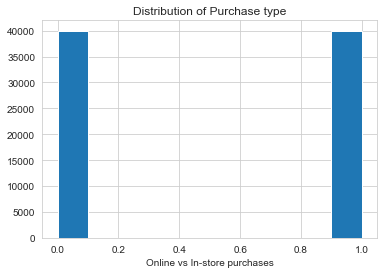

In [102]:
#use matplotlib to show a histogram comparing number of in-store vs online purchases

plt.hist(data['in-store'])
plt.xlabel('Online vs In-store purchases')
plt.title('Distribution of Purchase type')
plt.show()

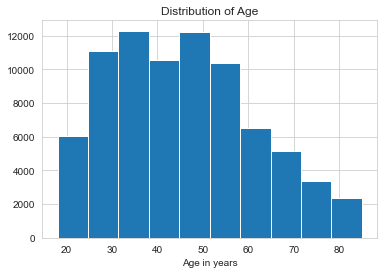

In [103]:
#show histogram of customer age distribution
#histograms are meant to plot the distribution of data, usually continuous variables

plt.hist(data['age'], bins = 10)
plt.xlabel('Age in years')
plt.title('Distribution of Age')
plt.show()

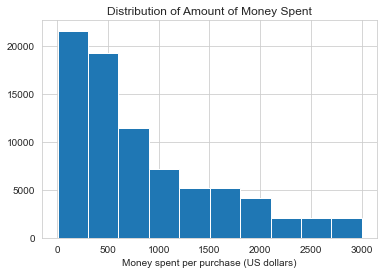

In [104]:
#show histogram of distribution of amount of money spent

plt.hist(data['amount'], bins = 10)
plt.xlabel('Money spent per purchase (US dollars)')
plt.title('Distribution of Amount of Money Spent')
plt.show()

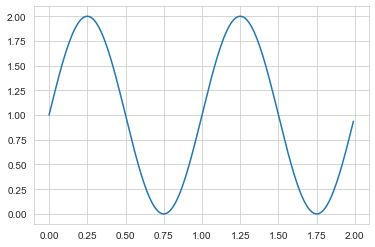

In [105]:
#example of a line plot (which we are not able to use with our current data)
#used to illustrate range and mode of any given numerical variable

import numpy as np
#data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

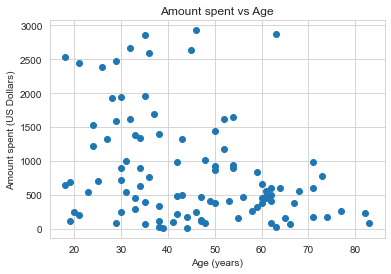

In [106]:
#scatter plots -- we must create variables for the two desired features in order to compare them
#first we will take 100 random samples from the data

data_sample = data.sample(100)

#then we create variables for the x and y axes
x = data_sample['age']
y = data_sample['amount']

#then we have matplotlib create a scatter plot using these variables
plt.scatter(x, y, marker = 'o') #marker 'o' plots circles, there is a list of other markers to use
plt.title('Amount spent vs Age') #create title of graph
plt.xlabel('Age (years)') #label the x axis
plt.ylabel('Amount spent (US Dollars)') #label the y axis
plt.show()

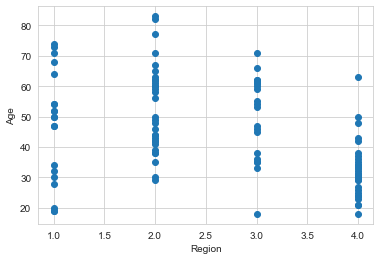

In [107]:
#age of customers in each region

x = data_sample['region']
y = data_sample['age']

plt.scatter(x, y, marker = 'o')
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()

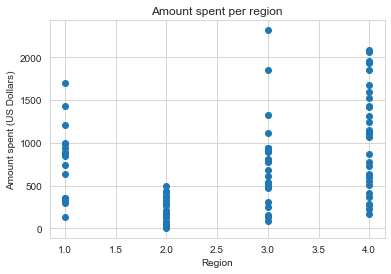

In [108]:
#amount spent per region

data_sample2 = data.sample(100)

x = data_sample2['region']
y = data_sample2['amount']

plt.scatter(x, y, marker = 'o')
plt.title('Amount spent per region')
plt.xlabel('Region')
plt.ylabel('Amount spent (US Dollars)')
plt.show()

#this backs up the findings from the bar graphs from earlier
#4 spends most, then 3, 1, 2

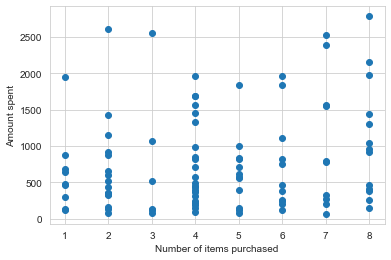

In [109]:
#items purchased v amount spent

data_sample3 = data.sample(100)

x = data_sample3['items']
y = data_sample3['amount']

plt.scatter(x, y, marker = 'o')
plt.xlabel('Number of items purchased')
plt.ylabel('Amount spent')
plt.show()

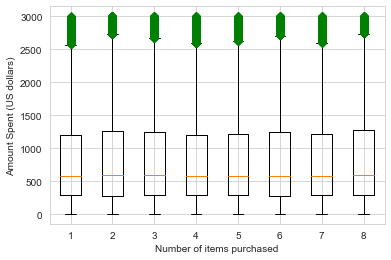

In [110]:
#boxplot showing items purchased vs amount spent

it1 = data.loc[data['items'] == 1, :]
it2 = data.loc[data['items'] == 2, :]
it3 = data.loc[data['items'] == 3, :]
it4 = data.loc[data['items'] == 4, :]
it5 = data.loc[data['items'] == 5, :]
it6 = data.loc[data['items'] == 6, :]
it7 = data.loc[data['items'] == 7, :]
it8 = data.loc[data['items'] == 8, :]

A = it1['amount']
B = it2['amount']
C = it3['amount']
D = it4['amount']
E = it5['amount']
F = it6['amount']
G = it7['amount']
H = it8['amount']

items = [A, B, C, D, E, F, G, H]

plt.boxplot(items, 0, 'gD')
plt.xlabel('Number of items purchased')
plt.ylabel('Amount Spent (US dollars)')
plt.show()

#there doesn't appear to be much difference between number of items bought and amount spent
#the correlation coeff seems to back this up

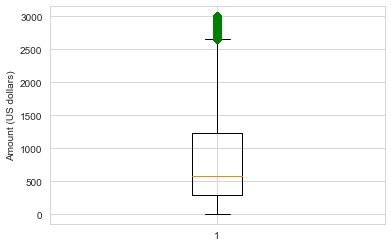

In [111]:
#create a box plot
#this shows average amount spend across all regions

A = data['amount']
plt.boxplot(A, 0, 'gD')
plt.ylabel('Amount (US dollars)')
plt.show()

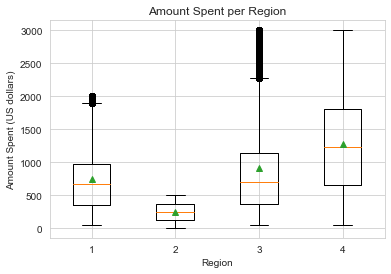

In [112]:
#separate data by region

region1 = data.loc[data['region'] == 1, :]
region2 = data.loc[data['region'] == 2, :]
region3 = data.loc[data['region'] == 3, :]
region4 = data.loc[data['region'] == 4, :]

#compare region to amount
A = region1['amount']
B = region2['amount']
C = region3['amount']
D = region4['amount']
regions = [A, B, C, D]

#create a boxplot showing the data
plt.boxplot(regions, 0, showmeans = True) #create boxplot showing 'true means'
plt.xlabel('Region')
plt.ylabel('Amount Spent (US dollars)')
plt.title('Amount Spent per Region')
plt.show()

#it looks like on average region 4 spent the highest, followed by region 3, then 1, then region 2
#region 2 spent the least, and that is also the region that only made purchases online
#again, this backs up info from previous analysis

<AxesSubplot:xlabel='region', ylabel='amount'>

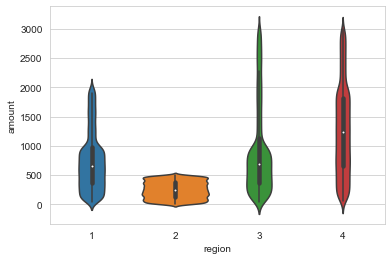

In [113]:
#create a violin plot using seaborn -- seems easier than matplotlib

sn.violinplot(x = 'region', y = 'amount', data = data) 

<AxesSubplot:xlabel='region', ylabel='age'>

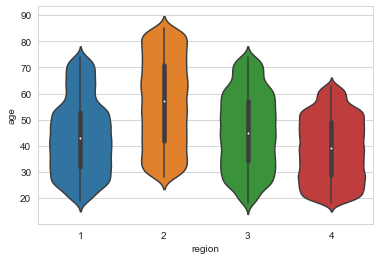

In [114]:
#age vs region
#age appears to trend older in group 2.. which also makes purchases only online
#older may also have to do with less amount spent

sn.violinplot(x = 'region', y = 'age', data = data)

<AxesSubplot:xlabel='in-store', ylabel='amount'>

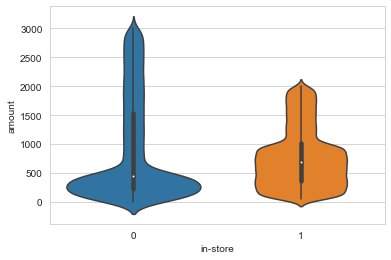

In [115]:
#do people spend more online vs in-store?

sn.violinplot(x = 'in-store', y = 'amount', data = data)

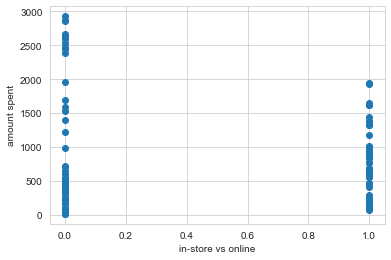

In [116]:
#in-store vs online scatter plot

x = data_sample['in-store']
y = data_sample['amount']

plt.scatter(x, y)
plt.xlabel('in-store vs online')
plt.ylabel('amount spent')
plt.show()

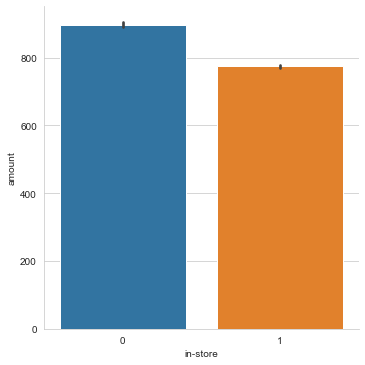

In [117]:
#bar graph showing average amount spent online vs in store

sn.catplot(x = 'in-store', y = 'amount', data = data, kind = 'bar')

<AxesSubplot:xlabel='region', ylabel='items'>

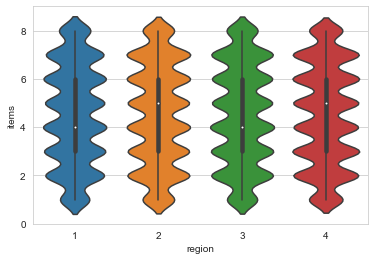

In [118]:
#number of items bought per region does not differ much

sn.violinplot(x = 'region', y = 'items', data = data)

In [119]:
corr_mat = data.corr()
print(corr_mat)

#it appears that there is a slight negative correlation between age and amount
#older age may mean they spend less
#region and amount show a stronger correlation

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


<AxesSubplot:>

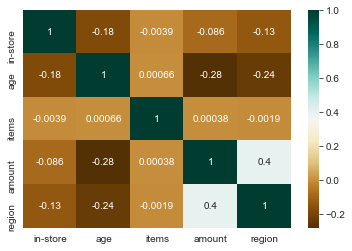

In [120]:
#create a heat map of the correlation data
#this makes it a bit easier to visualize

sn.heatmap(corr_mat, cmap = 'BrBG', annot = True) #cmap allows change of colors

In [121]:
cov_mat = data.cov()
print(cov_mat)

#region and amount show a positive relationship

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [122]:
data.to_csv('Cleaned_Demographic_Data.csv') #save our cleaned data to a csv for use in next notebook